In [28]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from FTransformaciones_tiempo_frecuencia import Espectro, señal
from FRespuestastyfdefiltrosFIReIIR import FIRrespt,IIRrespt,FIRrespf,IIRrespf

- - -

<img title="a title" alt="Alt text" src="Imagenes/Captura de pantalla 2022-11-02 a la(s) 19.47.55.png">

##### En la hoja.

- - -

<img title="a title" alt="Alt text" src="Imagenes/Captura de pantalla 2022-11-02 a la(s) 19.48.07.png">

# Apartado A

    Polos solo en el origen: es NO RECURSIVO.

In [29]:
q1 = 0+1j*1.875
q2 = 0+1j*0.533
q3 = 0-1j*0.533
q4 = 0-1j*1.875

p1 = 0+1j*0

w = np.linspace (0,2*np.pi,2000)

z = np.exp(1j*w)
H2a = ((z-q1)*(z-q2)*(z-q3)*(z-q4)) / (z**5)
abs(H2a)

array([5.79846439, 5.7984249 , 5.79830642, ..., 5.79830642, 5.7984249 ,
       5.79846439])

/var/folders/qz/mrzkg5ld5klg34bfmz0j94sw0000gn/T/ipykernel_2271/3808586522.py:11: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  fig.legend ("Módulo","Fase")


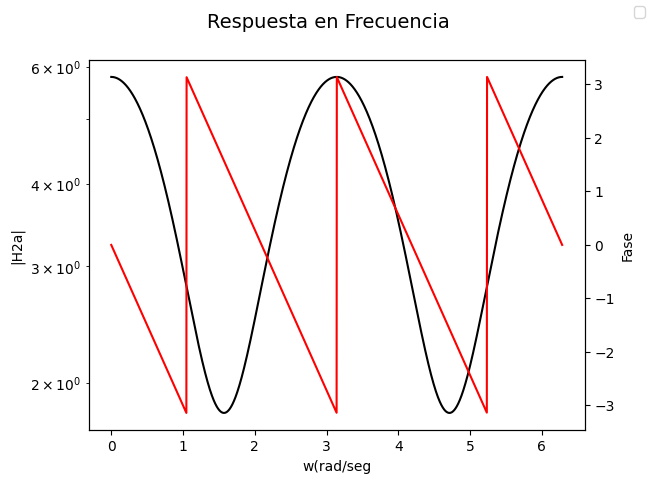

In [30]:
#Gráfico
fig,ax = plt.subplots()
fig.suptitle ("Respuesta en Frecuencia",fontsize=14)
ax.semilogy(w,abs(H2a),"k")
ax.set_xlabel ("w(rad/seg")
ax.set_ylabel ("|H2a|")
ax2=ax.twinx()
ax2.plot(w,np.angle(H2a),"r")
ax2.set_xlabel ("w(rad/seg")
ax2.set_ylabel ("Fase")
fig.legend ("Módulo","Fase")
plt.show()

### Respuesta al impulso

In [31]:
#Coeficientes de los ceros
c2a = np.array ([ 1 , -q1-q2-q3-q4 , q1*q2+q1*q3+q1*q4+q2*q3+q2*q4+q3*q4 , -q1*q2*q3-q1*q2*q4-q1*q3*q4-q2*q3*q4 , q1*q2*q3*q4]).real

#Coeficientes de los polos
d2a = np.array ([ 1 , 0 , 0 , 0 , 0 ]).real

print (c2a,np.sum(c2a))

[ 1.         -0.          3.799714    0.          0.99875039] 5.798464390625


In [32]:
#Función impulso unitario
nx = np.arange (-(len(c2a)-1),40)
impulso = np.piecewise (nx,[nx==0],[lambda nx:1, lambda nx: 0])

ny = np.arange (-(len(c2a)-1),40)

#Hacemos que nuestras salidas pasadas sean iguales a cero
y = np.arange (0,len(ny),dtype=np.float64)
y[0] = 0 ; y[1] = 0 ; y[2] = 0 ; y[3] = 0

<img title="a title" alt="Alt text" src="Imagenes/Captura de pantalla 2022-11-02 a la(s) 21.16.28.png">

In [33]:
for i in np.arange (len(c2a)-1,len(y)): #"i" equivale a "r"
    z=0
    for j in np.arange(1,len(d2a)): #"j" eqiuvale a "k"
         z = z - d2a[j]*y[i-j] + c2a[j]*impulso[i-j]
    y[i] = (z + c2a[0] * impulso[i]/d2a[0])
#x = impulso (entrada)

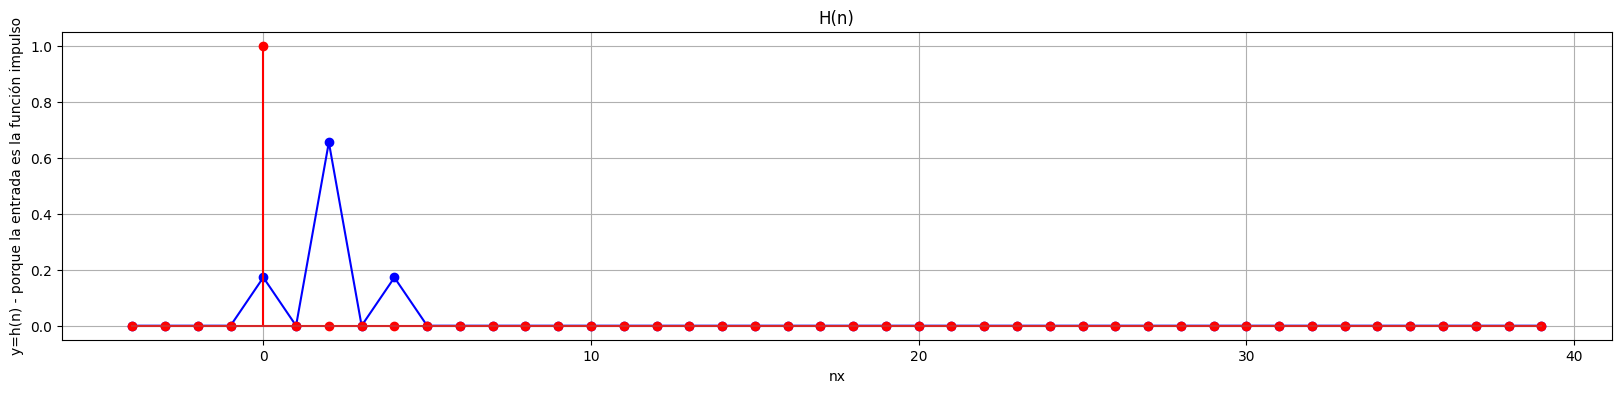

In [34]:
plt.figure (figsize=(20,4))
plt.plot (ny,y/np.sum(c2a),"o-",color="blue")
plt.stem (nx,impulso,"r")
plt.xlabel ("nx")
plt.ylabel ("y=h(n) - porque la entrada es la función impulso")
plt.title ("H(n)")
plt.grid (True)
plt.show ()

In [35]:
##### Otra forma de obtener los coeficientes (utilizando la función coeff)
from FCalculo_de_coeficientes_a_partir_de_polos_y_ceros import coeff

ceros2a = np.array ([q1,q2,q3,q4])
polos2a = np.array ([0,0,0,0])

h2a = coeff (ceros2a)
nh2a = np.arange (len(h2a))
h2a,np.sum(h2a)

(array([1.        , 0.        , 3.799714  , 0.        , 0.99875039]),
 5.798464390625)

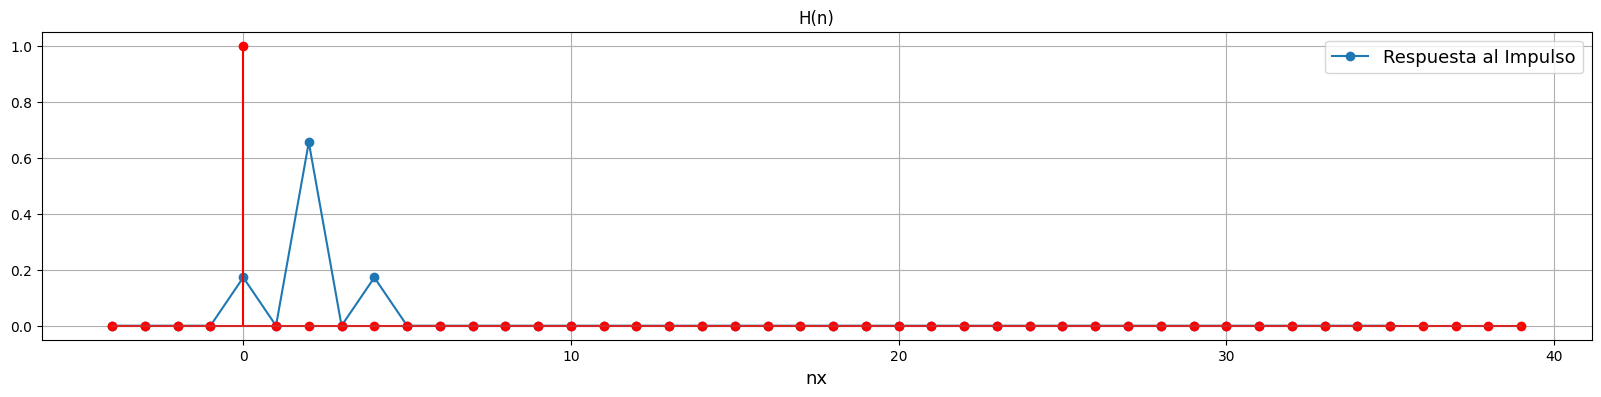

In [36]:
resp_imp = FIRrespt (nx,impulso,nh2a,h2a)
Fs = 1

plt.figure (figsize=(20,4))
plt.plot (resp_imp[:40,0]/Fs,resp_imp[:40,1]/np.sum(h2a),"o-",label="Respuesta al Impulso")
plt.stem (nx,impulso,"r")
plt.xlabel ("nx", fontsize=13)
plt.legend (fontsize=13)
plt.title ("H(n)")
plt.grid (True)
plt.show()

# Apartado B

    Polos solo en el origen: es NO RECURSIVO.

In [37]:
q_1 = 0+1j*1.3
q_2 = 0+1j*0.533
q_3 = 0-1j*0.533
q_4 = 0-1j*1.3

p_1 = 0+1j*0

w = np.linspace (0,2*np.pi,2000)

z = np.exp(1j*w)
H2b = ((z-q_1)*(z-q_2)*(z-q_3)*(z-q_4)) / (z**5)
abs(H2b)

array([3.45419941, 3.45417171, 3.45408861, ..., 3.45408861, 3.45417171,
       3.45419941])

/var/folders/qz/mrzkg5ld5klg34bfmz0j94sw0000gn/T/ipykernel_2271/1060292702.py:11: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  fig.legend ("Módulo","Fase")


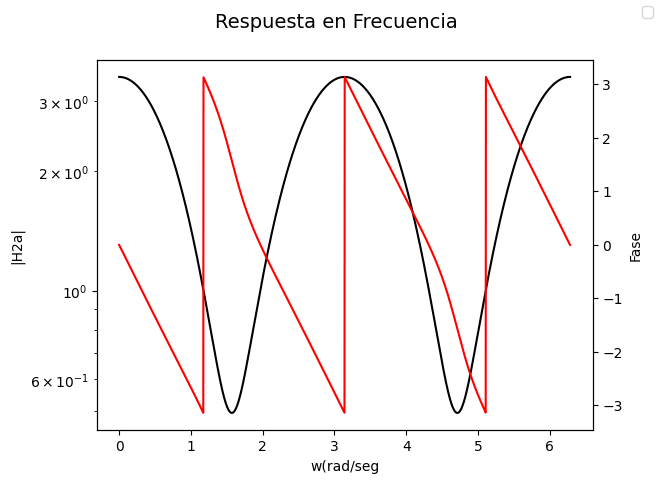

In [38]:
#Gráfico
fig,ax = plt.subplots()
fig.suptitle ("Respuesta en Frecuencia",fontsize=14)
ax.semilogy(w,abs(H2b),"k")
ax.set_xlabel ("w(rad/seg")
ax.set_ylabel ("|H2a|")
ax2=ax.twinx()
ax2.plot(w,np.angle(H2b),"r")
ax2.set_xlabel ("w(rad/seg")
ax2.set_ylabel ("Fase")
fig.legend ("Módulo","Fase")
plt.show()

### Respuesta al impulso

In [39]:
#Coeficientes de los ceros
c2b = np.array ([ 1 , -q_1-q_2-q_3-q_4 , q_1*q_2+q_1*q_3+q_1*q_4+q_2*q_3+q_2*q_4+q_3*q_4 , -q_1*q_2*q_3-q_1*q_2*q_4-q_1*q_3*q_4-q2*q_3*q_4 , q_1*q_2*q_3*q_4]).real

#Coeficientes de los polos
d2b = np.array ([ 1 , 0 , 0 , 0 , 0 ]).real

print (c2b,np.sum(c2b))


#Función impulso unitario
nx = np.arange (-(len(c2b)-1),40)
impulso = np.piecewise (nx,[nx==0],[lambda nx:1, lambda nx: 0])

ny = np.arange (-(len(c2b)-1),40)

#Hacemos que nuestras salidas pasadas sean iguales a cero
y = np.arange (0,len(ny),dtype=np.float64)
y[0] = 0 ; y[1] = 0 ; y[2] = 0 ; y[3] = 0

[ 1.         -0.          1.974089    0.          0.48011041] 3.45419941


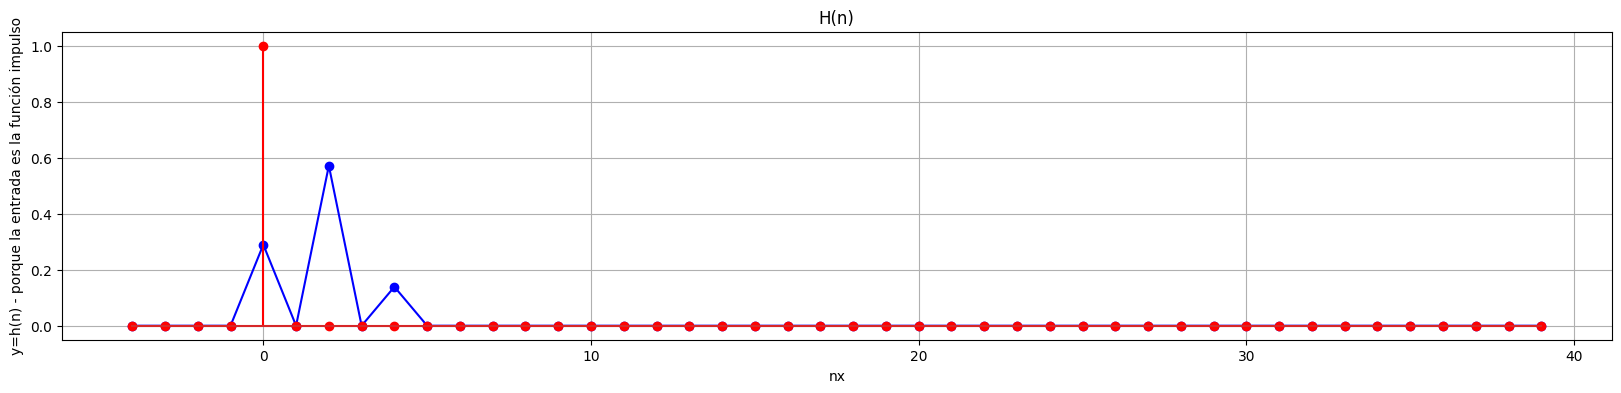

In [40]:
for i in np.arange (len(c2b)-1,len(y)): #"i" equivale a "r"
    z=0
    for j in np.arange(1,len(d2b)): #"j" eqiuvale a "k"
         z = z - d2b[j]*y[i-j] + c2b[j]*impulso[i-j]
    y[i] = (z + c2b[0] * impulso[i]/d2b[0])
#x = impulso (entrada)


plt.figure (figsize=(20,4))
plt.plot (ny,y/np.sum(c2b),"o-",color="blue")
plt.stem (nx,impulso,"r")
plt.xlabel ("nx")
plt.ylabel ("y=h(n) - porque la entrada es la función impulso")
plt.title ("H(n)")
plt.grid (True)
plt.show ()

In [41]:
##### Otra forma de obtener los coeficientes (utilizando la función coeff)
from FCalculo_de_coeficientes_a_partir_de_polos_y_ceros import coeff

ceros2b = np.array ([q_1,q_2,q_3,q_4])
polos2b = np.array ([0,0,0,0])

h2b = coeff (ceros2b)
nh2b = np.arange (len(h2b))
h2b,np.sum(h2b)

(array([1.        , 0.        , 1.974089  , 0.        , 0.48011041]),
 3.45419941)

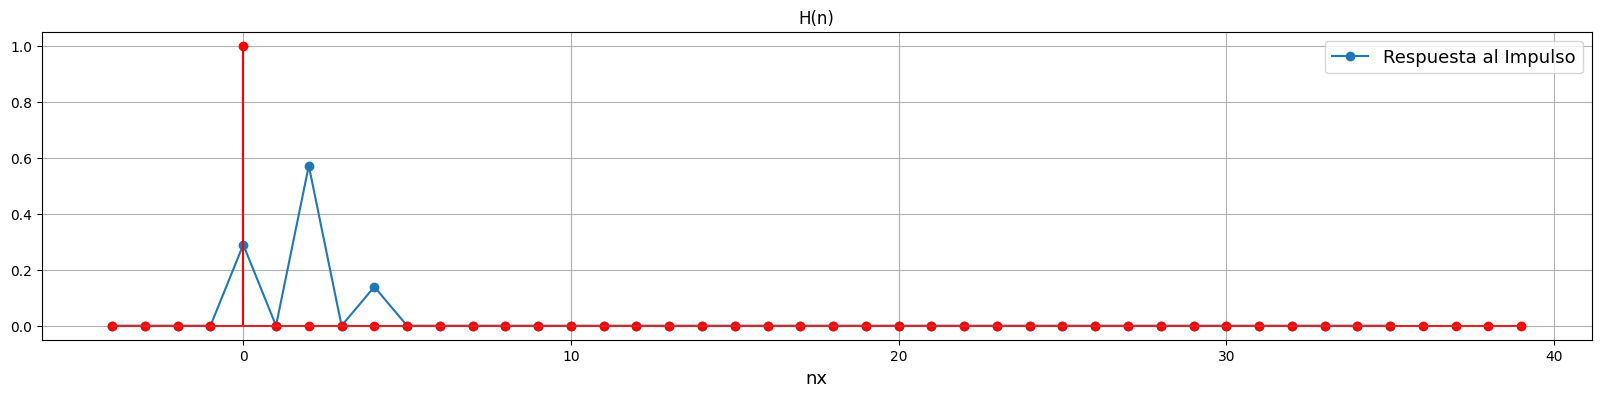

In [42]:
resp_impB = FIRrespt (nx,impulso,nh2b,h2b)
Fs = 1

plt.figure (figsize=(20,4))
plt.plot (resp_impB[:40,0]/Fs,resp_impB[:40,1]/np.sum(h2b),"o-",label="Respuesta al Impulso")
plt.stem (nx,impulso,"r")
plt.xlabel ("nx", fontsize=13)
plt.legend (fontsize=13)
plt.title ("H(n)")
plt.grid (True)
plt.show()

- - -

<img title="a title" alt="Alt text" src="Imagenes/Captura de pantalla 2022-11-02 a la(s) 19.48.32.png">

# Apartado A

In [43]:
# H(z) = Y(z)/X(z) = (z-q)/(z-p) = (z-0)/(z-0,5)

/var/folders/qz/mrzkg5ld5klg34bfmz0j94sw0000gn/T/ipykernel_2271/1701610568.py:19: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  fig.legend ("Módulo","Fase")


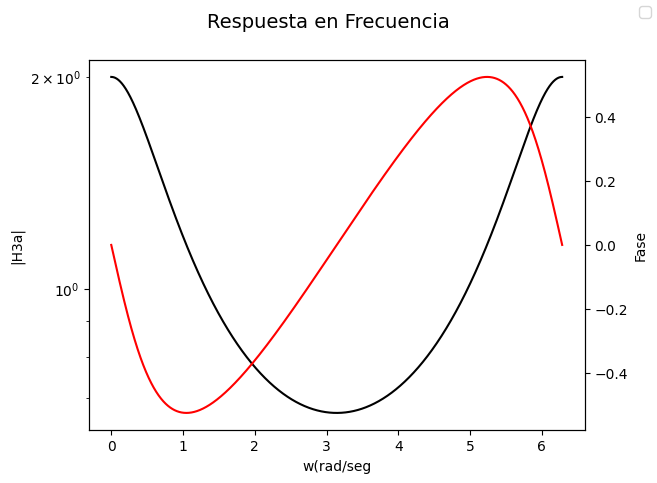

In [44]:
Na = 2000 #número de muestras
w = np.linspace (0,2*np.pi,Na)

qu1 = 0+1j*0
pe1 = 0.5+0*j

H3a = (np.exp(1j*w)-qu1) / (np.exp(1j*w)-pe1)

#Gráfico
fig,ax = plt.subplots()
fig.suptitle ("Respuesta en Frecuencia",fontsize=14)
ax.semilogy(w,abs(H3a),"k")
ax.set_xlabel ("w(rad/seg")
ax.set_ylabel ("|H3a|")
ax2=ax.twinx()
ax2.plot(w,np.angle(H3a),"r")
ax2.set_xlabel ("w(rad/seg")
ax2.set_ylabel ("Fase")
fig.legend ("Módulo","Fase")
plt.show()

### Respuesta al impulso

In [45]:
cerosss = np.array ([qu1]) ; polosss = np.array ([pe1])
ccc1 = coeff (cerosss) ; ppp1 = coeff (polosss)
ccc1,ppp1

(array([1., 0.]), array([ 1. , -0.5]))

In [46]:
#Coeficientes de los ceros
c3a = np.array ([ 1 , 0 ])
#Coeficientes de los polos
d3a = np.array ([ 1 , -0.5 ]).real

#Función impulso unitario
nx = np.arange (-(len(c2a)-1),40)
impulso = np.piecewise (nx,[nx==0],[lambda nx:1, lambda nx: 0])

ny = np.arange (-(len(d2a)-1),40)

In [47]:
y3a = np.arange (0,len(ny),dtype=np.float16)
y3a[0]=0 ; y3a[1]=0

for i in np.arange (len(d3a)-1,len(y3a)):
    z3a=0
    for j in np.arange(1,len(d3a)): #"j" eqiuvale a "k"
         z3a = z3a - d3a[j]*y3a[i-j] + c3a[j]*impulso[i-j]
    y3a[i] = (z3a + c3a[0] * impulso[i]/d3a[0])    

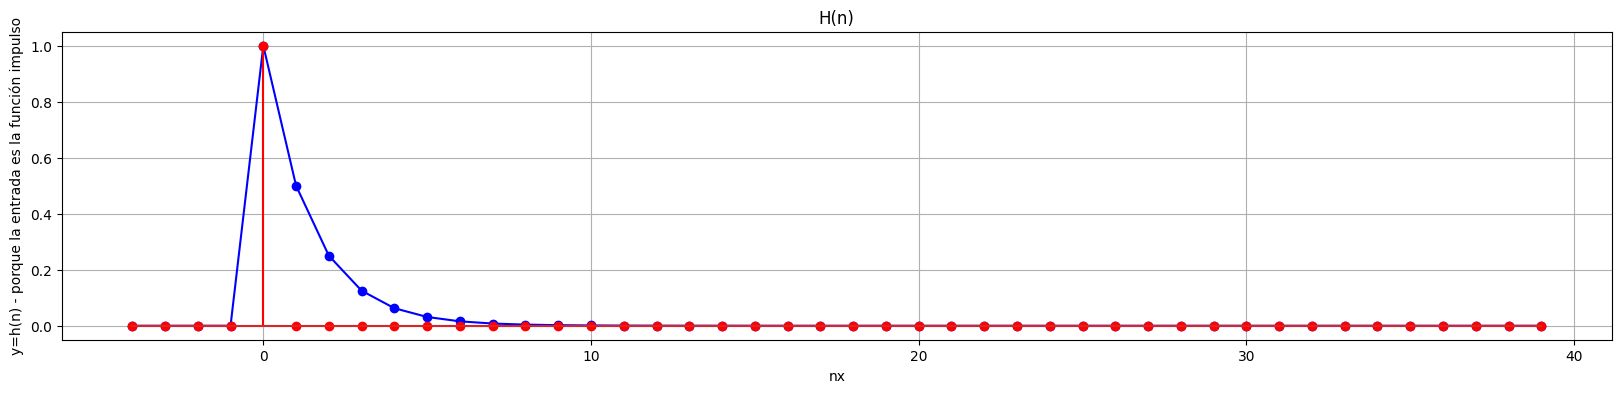

In [48]:
plt.figure (figsize=(20,4))
plt.plot (ny,y3a/np.sum(c3a),"o-",color="blue")
plt.stem (nx,impulso,"r")
plt.xlabel ("nx")
plt.ylabel ("y=h(n) - porque la entrada es la función impulso")
plt.title ("H(n)")
plt.grid (True)
plt.show ()

# Apartado B

/var/folders/qz/mrzkg5ld5klg34bfmz0j94sw0000gn/T/ipykernel_2271/578460623.py:19: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  fig.legend ("Módulo","Fase")


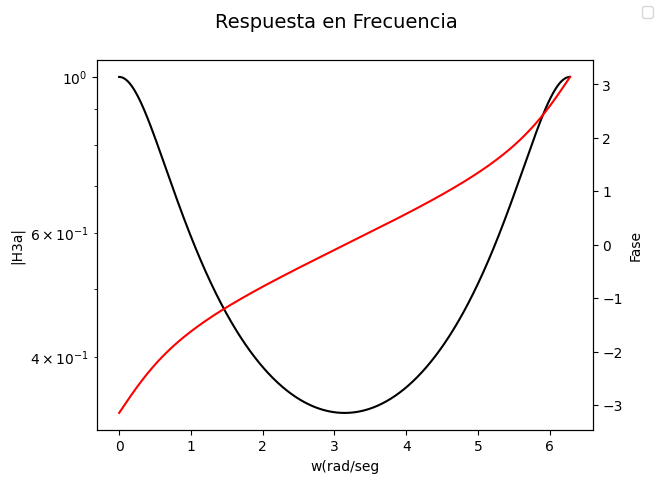

In [49]:
Nb = 2000 #número de muestras
w = np.linspace (0,2*np.pi,Nb)

qu1b = 0+1j*0
pe1b = 2+0*j

H3b = (np.exp(1j*w)-qu1b) / (np.exp(1j*w)-pe1b)

#Gráfico
fig,ax = plt.subplots()
fig.suptitle ("Respuesta en Frecuencia",fontsize=14)
ax.semilogy(w,abs(H3b),"k")
ax.set_xlabel ("w(rad/seg")
ax.set_ylabel ("|H3a|")
ax2=ax.twinx()
ax2.plot(w,np.angle(H3b),"r")
ax2.set_xlabel ("w(rad/seg")
ax2.set_ylabel ("Fase")
fig.legend ("Módulo","Fase")
plt.show()

### Respuesta al impulso

In [50]:
cerosss1 = np.array ([qu1b]) ; polosss1 = np.array ([pe1b])
ccc11 = coeff (cerosss1) ; ppp11 = coeff (polosss1)
ccc11,ppp11

(array([1., 0.]), array([ 1., -2.]))

In [51]:
#Coeficientes de los ceros
c3b = np.array ([ 1 , 0 ])
#Coeficientes de los polos
d3b = np.array ([ 1 , -2 ]).real

#Función impulso unitario
nx = np.arange (-(len(c3b)-1),40)
impulso = np.piecewise (nx,[nx==0],[lambda nx:1, lambda nx: 0])

ny = np.arange (-(len(d3b)-1),40)

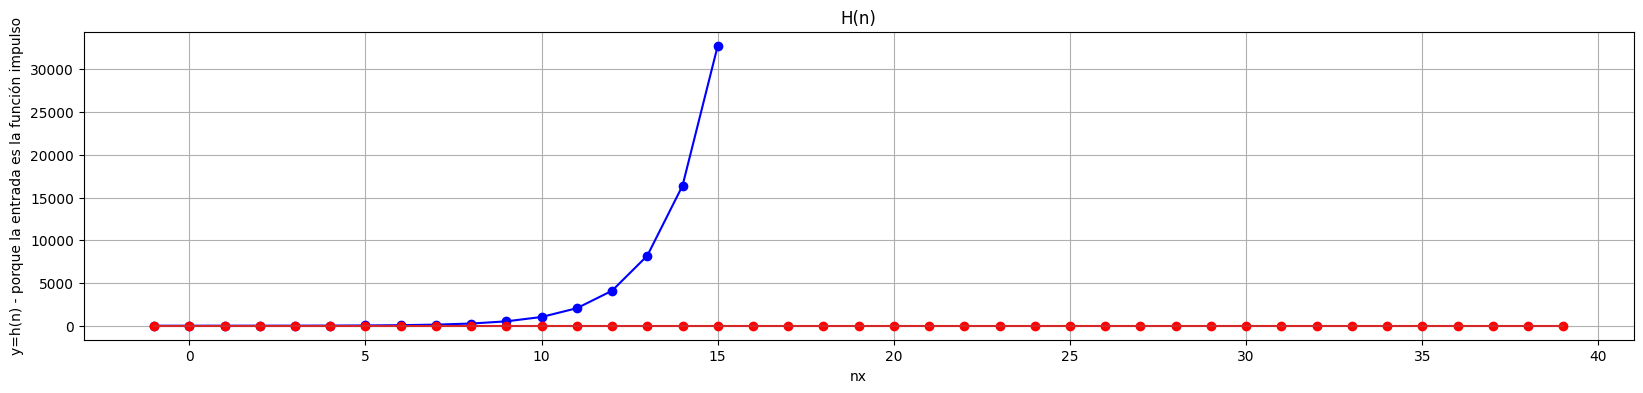

In [52]:
y3b = np.arange (0,len(ny),dtype=np.float16)
y3b[0]=0 ; y3b[1]=0

for i in np.arange (len(d3b)-1,len(y3b)):
    z3b=0
    for j in np.arange(1,len(d3b)): #"j" equivale a "k"
        z3b = z3b - d3b[j]*y3b[i-j] + c3b[j]*impulso[i-j]
    y3b [i] = (z3b + c3b[0] * impulso[i]/d3b[0])


plt.figure (figsize=(20,4))
plt.plot (ny,y3b/np.sum(c3b),"o-",color="blue")
plt.stem (nx,impulso,"r")
plt.xlabel ("nx")
plt.ylabel ("y=h(n) - porque la entrada es la función impulso")
plt.title ("H(n)")
plt.grid (True)
plt.show ()

- - -

<img title="a title" alt="Alt text" src="Imagenes/Captura de pantalla 2022-11-02 a la(s) 19.48.43.png">

# Apartado A

In [53]:
N4a =  2000
w = np.linspace (0,2*np.pi,N4a)

q1_4a = -1*np.cos(2*np.pi/3) + 1j*np.sin(2*np.pi/3)
q2_4a = -1*np.cos(2*np.pi/3) - 1j*np.sin(2*np.pi/3)
q3_4a = -q1_4a
q4_4a = -q2_4a

/var/folders/qz/mrzkg5ld5klg34bfmz0j94sw0000gn/T/ipykernel_2271/2372602971.py:14: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  fig.legend ("Módulo","Fase")


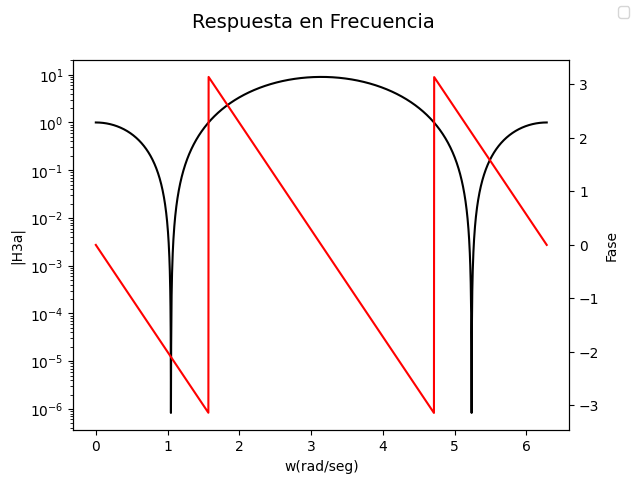

In [54]:
z_4a = np.exp(1j*w)
H4a = ((z_4a-q1_4a)**2) * ((z_4a-q2_4a) **2) / (z_4a**4)

#Gráfico
fig,ax = plt.subplots()
fig.suptitle ("Respuesta en Frecuencia",fontsize=14)
ax.semilogy(w,abs(H4a),"k")
ax.set_xlabel ("w(rad/seg)")
ax.set_ylabel ("|H3a|")
ax2=ax.twinx()
ax2.plot(w,np.angle(H4a),"r")
ax2.set_xlabel ("w(rad/seg)")
ax2.set_ylabel ("Fase")
fig.legend ("Módulo","Fase")
plt.show()

# Apartado B

<img title="a title" alt="Alt text" src="Imagenes/Captura de pantalla 2022-11-03 a la(s) 16.08.50.png">

In [55]:
N4b =  2000
w = np.linspace (0,2*np.pi,N4b)

q1_4b = -1*np.cos(2*np.pi/3) + 1j*np.sin(2*np.pi/3)
q2_4b = -1*np.cos(2*np.pi/3) - 1j*np.sin(2*np.pi/3)
q3_4b = -q1_4b
q4_4b = -q2_4b

p1_4b = -0.9*np.cos (23*np.pi/36) + 0.9j*np.sin (23*np.pi/36)
p2_4b = -0.9*np.cos (23*np.pi/36) - 0.9j*np.sin (23*np.pi/36)
p3_4b = -0.9*np.cos (25*np.pi/36) + 0.9j*np.sin (25*np.pi/36)
p4_4b = -0.9*np.cos (25*np.pi/36) - 0.9j*np.sin (25*np.pi/36)

/var/folders/qz/mrzkg5ld5klg34bfmz0j94sw0000gn/T/ipykernel_2271/3490209716.py:15: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  fig.legend ("Módulo","Fase")


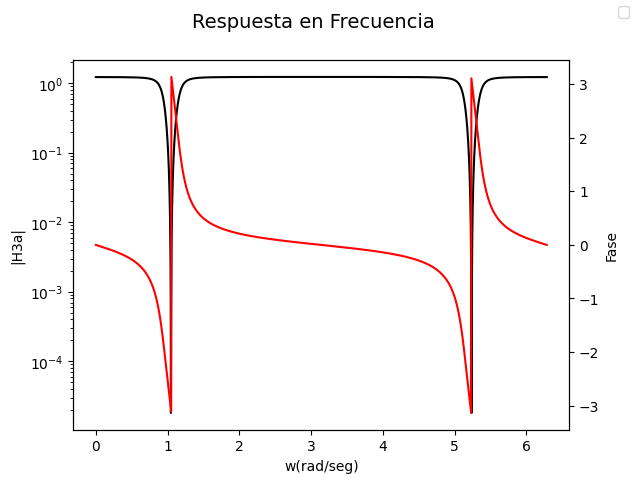

In [56]:
#Cálculo de H
z_4b = np.exp(1j*w)
H4b = ((z_4b-q1_4b)**2) * ((z_4b-q2_4b) **2) / ((z_4b-p1_4b)*(z_4b-p2_4b)*(z_4b-p3_4b)*(z_4b-p4_4b))

#Gráfico
fig,ax = plt.subplots()
fig.suptitle ("Respuesta en Frecuencia",fontsize=14)
ax.semilogy(w,abs(H4b),"k")
ax.set_xlabel ("w(rad/seg)")
ax.set_ylabel ("|H3a|")
ax2=ax.twinx()
ax2.plot(w,np.angle(H4b),"r")
ax2.set_xlabel ("w(rad/seg)")
ax2.set_ylabel ("Fase")
fig.legend ("Módulo","Fase")
plt.show()

- - -

<img title="a title" alt="Alt text" src="Imagenes/Captura de pantalla 2022-11-02 a la(s) 19.48.51.png">

# Apartado A

In [57]:
N5 = 2000
w5 = np.linspace (0,np.pi,N5)
b5 = np.array([-2, -0.8, -0.5, 0.8, 1]) 

ceros5 = np.empty(0)
polos5 = np.empty(0)
coef_c5 = np.empty(0)
coef_d5 = np.empty(0)
H5a = np.empty(0)

In [58]:
for i in range(len(b5)):
    q5 = b5[i] + 1j*0
    p5 = -b5[i] + 1j*0
    coef_c5 = np.append(coef_c5, np.array([1, -b5[i]]))
    coef_d5 = np.append(coef_d5, np.array([1, b5[i]]))
    ceros5 = np.append(ceros5, q5)
    polos5 = np.append(polos5, p5)
    H5a = np.append(H5a, (np.exp(1j*w5)-q5) / (np.exp(1j*w5)-p5) )


H5 = np.reshape(H5a,(2000,5),order='F')

coef_c5 = np.reshape(coef_c5, (5,2))
coef_d5 = np.reshape(coef_d5, (5,2))

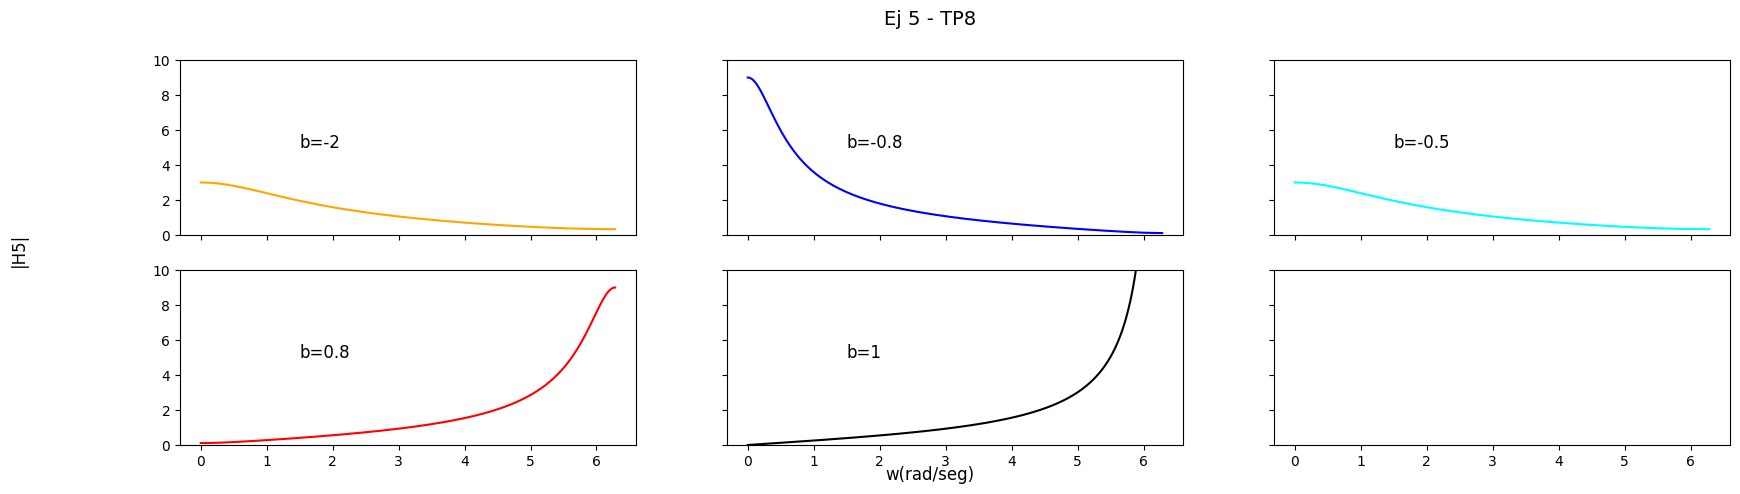

In [59]:
f, ax = plt.subplots(2,3, sharey=True, sharex=True, figsize=(20,5))
f.suptitle('Ej 5 - TP8', fontsize=14)
colores = ['orange', 'blue', 'cyan', 'red', 'k']
texto = ['b=-2','b=-0.8','b=-0.5','b=0.8','b=1']
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(w, abs(H5[0:2000,i]), color=colores[i])
    plt.text(1.5,5, s=texto[i], fontsize=12)
    plt.ylim(0,10)
f.text(0.5, 0.04, 'w(rad/seg)', ha='center',fontsize=12)
f.text(0.04, 0.5, '|H5|', va='center', rotation='vertical',fontsize=12)
plt.show()

    Para b = -2 es un Filtro Pasa Bajos

    Para b = -0.8 es un Filtro Pasa Bajos

    Para b = -0.5 es un Filtro Pasa Bajos

    Para b = 0.8 es un Filtro Pasa Altos
    
    Para b = 1 es un Filtro Pasa Altos

# Apartado B

    La ganancia del Filtro b = -2 es 3.

    La ganancia del Filtro b = -0.8 es 9.

    La ganancia del Filtro b = -0.5 es 3.

    La ganancia del Filtro b = 0.8 es 9.
    
    La ganancia del Filtro b = 1 es infinito.

# Apartado C

    H(z) = (1-(0.5.z^-1)) / (1+(0.5.z^-1)) 

    Y(z) / X(z) = (1-(0.5.z^-1)) / (1+(0.5.z^-1))

    Y(z).(1+(0.5.z^-1)) = X(z).(1-(0.5.z^-1))

    Y(z) + 0.5.Y(z).z^-1 = X(z) - 0.5.X(z).z^-1

    ---> Por lo que la y(n):
    y(n) = x(n) - 0.5 x(n-1) - 0.5 y(n-1)

- - -

<img title="a title" alt="Alt text" src="Imagenes/Captura de pantalla 2022-11-02 a la(s) 19.49.01.png">

# Apartado A

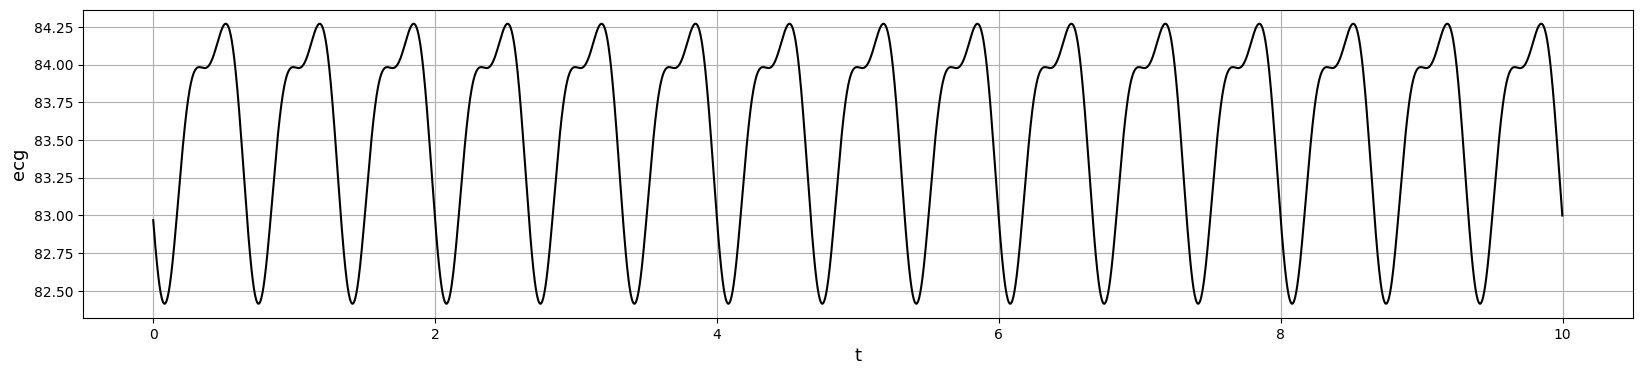

In [60]:
Fc = 90/60
Fs = 400
N6 = 4000 #10 veces la relación Fs/Fc, 40 puntos por ciclo, esto sería 10 ciclos.
n6 = np.arange (N6)
t6 = n6/Fs
pres6 = np.ndarray (N6)
z = 0
for j in np.arange (3):
    z=z+2*np.sqrt(80)/(np.pi*(2*(j+1)**2-1))*np.cos(2*np.pi*(j)*Fc*n6/Fs-(3*(j+1)**3-1)*np.pi/7)

pres6 = z + 80


#Gráfico
plt.figure(figsize=(20,4))
plt.plot(t6,pres6,"k")
plt.xlabel('t', fontsize=13)
plt.ylabel('ecg', fontsize=13)
plt.grid (True)
plt.show()

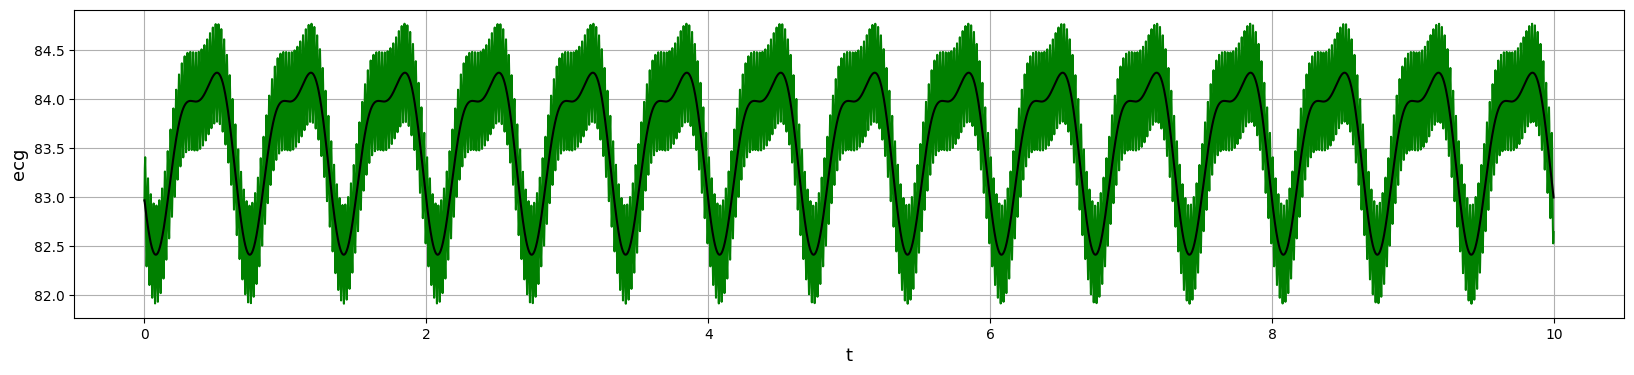

In [61]:
ruido = 0.5*np.sin (2*np.pi*50*t6)
pres6_noise = pres6 + ruido

#Gráfico
plt.figure(figsize=(20,4))
plt.plot(t6,pres6_noise,"g")
plt.plot(t6,pres6,"k")
plt.xlabel('t', fontsize=13)
plt.ylabel('ecg', fontsize=13)
plt.grid (True)
plt.show()

# Apartado B

    w = 2πf = 2π(F/Fs)

In [62]:
N6 = 2000
w6 = np.arange (0,np.pi,1/Fs)

w1N = 2*np.pi*50/Fs #Frecuencia de Filtrado Notch

q1_6 = np.cos(w1N) + 1j*np.sin (w1N) #En los ceros se ubican las frecuencias que quiero eliminar
q2_6 = np.cos(w1N) - 1j*np.sin (w1N)


p1_6 = 0+1j*0
p2_6 = 0+1j*0 #Agrego polos en el origen para generar estabilidad

#Calculo la función H
H6 = ((np.exp(1j*w6)-q1_6)*(np.exp(1j*w6)-q2_6)) / (np.exp(1j*w6)**2)

/var/folders/qz/mrzkg5ld5klg34bfmz0j94sw0000gn/T/ipykernel_2271/1681795783.py:11: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  fig.legend ("Módulo","Fase")


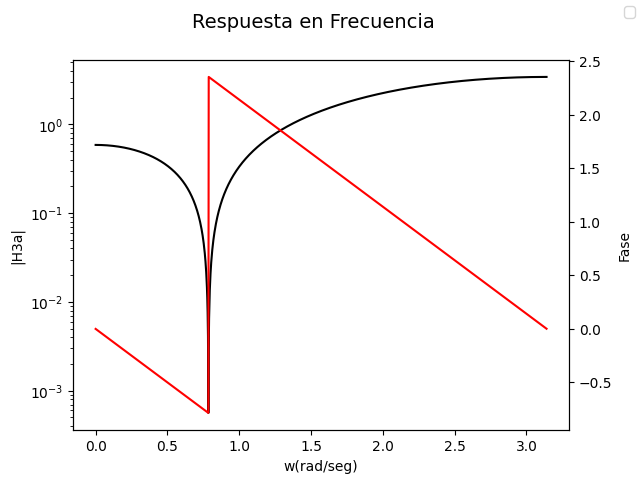

In [63]:
#Gráfico
fig,ax = plt.subplots()
fig.suptitle ("Respuesta en Frecuencia",fontsize=14)
ax.semilogy(w6,abs(H6),"k")
ax.set_xlabel ("w(rad/seg)")
ax.set_ylabel ("|H3a|")
ax2=ax.twinx()
ax2.plot(w6,np.angle(H6),"r")
ax2.set_xlabel ("w(rad/seg)")
ax2.set_ylabel ("Fase")
fig.legend ("Módulo","Fase")
plt.show()

In [64]:
#Para la respuesta al impulso y el filtro

ceros6 = np.array ([q1_6,q2_6])
polos6 = np.array ([p1_6,p2_6])

#Ceros
c6 = coeff (ceros6)
nc6 = np.arange (len(c6))

#Polos
p6 = coeff (polos6)
np6= np.arange (len(p6))

c6,np.sum(c6)

(array([ 1.        , -1.41421356,  1.        ]), 0.5857864376269049)

In [65]:
pres_filt = FIRrespt (t6,pres6_noise,nc6,c6)
pres_filt = pres_filt [2:len(pres_filt)-2] #porque tenemos 2 ceros

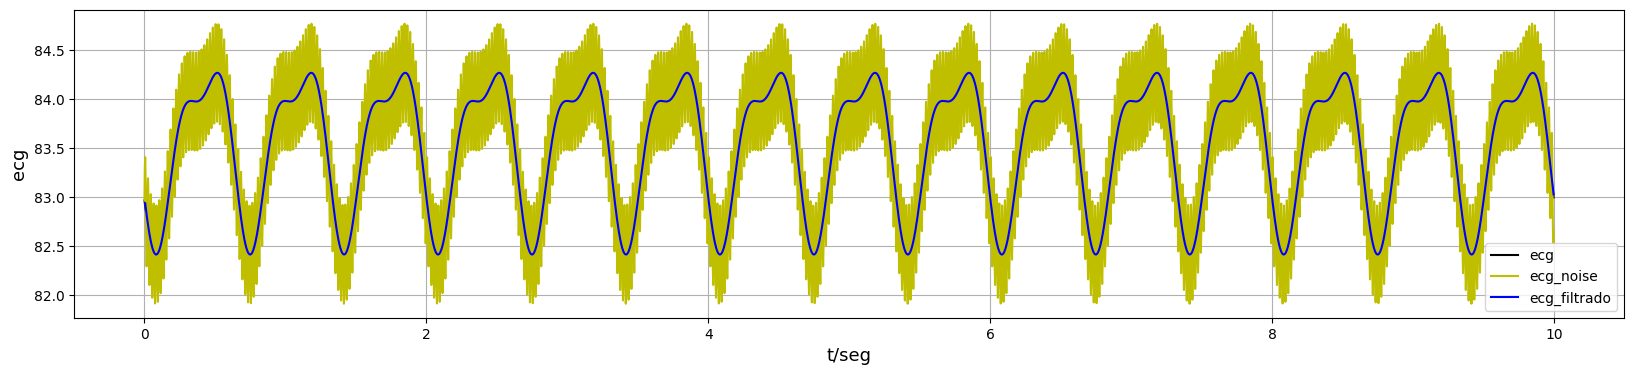

In [66]:
plt.figure(figsize=(20,4))
plt.plot(t6,pres6,"k", label="ecg")
plt.plot(t6,pres6_noise,"y",label="ecg_noise")
plt.plot(pres_filt[:,0]/Fs,pres_filt[:,1]/np.sum(c6),"b",label="ecg_filtrado")
plt.xlabel('t/seg', fontsize=13)
plt.ylabel('ecg', fontsize=13)
plt.legend()
plt.grid (True)
plt.show()

# Apartado C

In [67]:
def Circunferencia(x0,y0,r):
    phi = np.arange(0,2*np.pi,0.001)
    return x0 + r*np.cos(phi), y0 + r*np.sin(phi)

In [68]:
ceros66 = np.roots(np.array([1,0,-np.exp(np.pi*1j/2) ]))
polos66 = np.roots(np.array([1,0,0]))
ceros66, polos66

(array([ 0.70710678+0.70710678j, -0.70710678-0.70710678j]), array([0., 0.]))

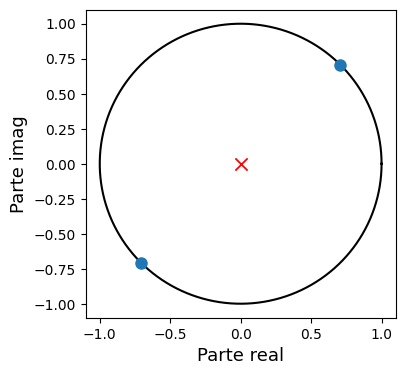

In [69]:
plt.figure(figsize=(4,4))
plt.plot(*Circunferencia(0,0,1), c='k')
plt.plot(ceros66.real,ceros66.imag,'o',ms=8)
plt.plot(polos66.real,polos66.imag,'rx',ms=8)
plt.xlabel('Parte real', fontsize=13)
plt.ylabel('Parte imag', fontsize=13)
plt.show()

In [70]:
w1N = 2*np.pi*50/Fs #Frecuencia de Filtrado Notch

q16 = np.cos(w1N) + 1j*np.sin (w1N) #En los ceros se ubican las frecuencias que quiero eliminar
q26 = np.cos(w1N) - 1j*np.sin (w1N)



CEROS6 = np.array ([q16,q26])
POLOS6 = np.array ([0,0]) #polos en el origen

nx6 = np.arange (-(len(CEROS6)-1),40)
impulso6 = np.piecewise (nx6,[nx6==0],[lambda nx6:1, lambda nx6: 0])

h6 = coeff (CEROS6)
nh6 = np.arange (len(h6))

h6,np.sum(h6)

(array([ 1.        , -1.41421356,  1.        ]), 0.5857864376269049)

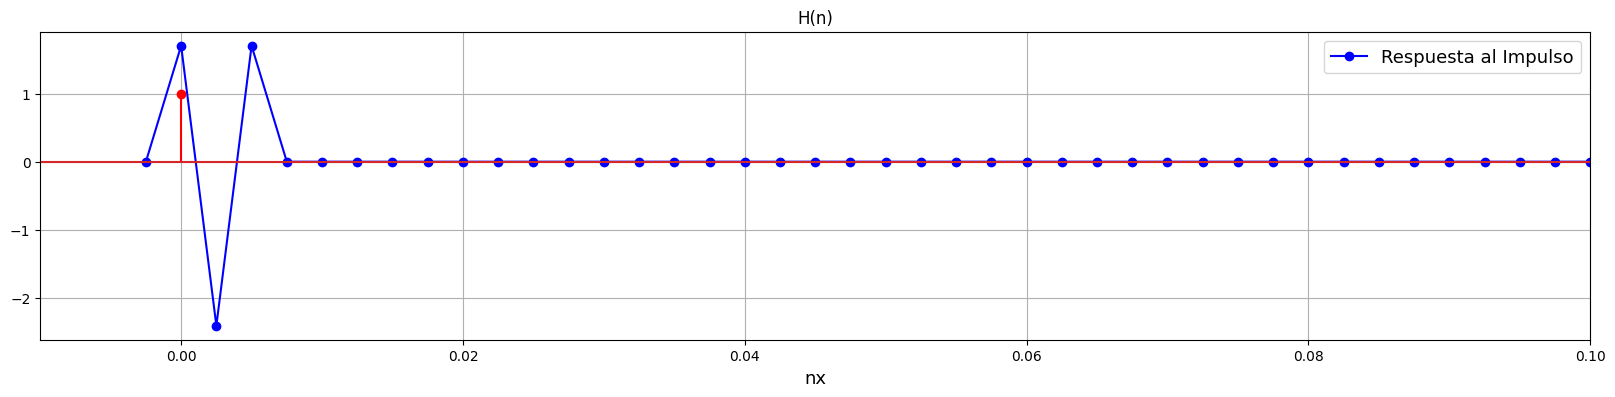

In [71]:
resp_imp = FIRrespt (nx6,impulso6,nh6,h6)
Fs = 400

plt.figure (figsize=(20,4))
plt.plot (resp_imp[:,0]/Fs,resp_imp[:,1]/np.sum(h6),"bo-",label="Respuesta al Impulso")
plt.stem (nx6,impulso6,"r")
plt.xlabel ("nx", fontsize=13)
plt.legend (fontsize=13)
plt.xlim (-0.01,0.1)
plt.title ("H(n)")
plt.grid (True)
plt.show()

- - -

<img title="a title" alt="Alt text" src="Imagenes/Captura de pantalla 2022-11-02 a la(s) 19.49.12.png">

# Apartado A

In [72]:
C = 5.64
Fc = 90/60 #Fc es la frecuencia cardiaca
Fs = 400
sigma = np.array ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])*2*np.pi
A = np.array ([0.98, -5.60, -3.99, -1.76, 8.23, -4.55, -6.70, 0.82, 5.76, 1.04, -4.91, -3.02, 2.51, 4.00, -1.27, -3.43, -0.57, 2.47, 0.77, -1.07])
B = np.array ([-3.82, 11.08, 2.08, 5.04, -2.76, -6.98, 3.38, 5.17, 0.60, -5.46, -2.02, 3.30, 3.99, -1.90, -3.93, 0.19, 3.13, 0.75, -1.89, -0.83])
t = np.arange (0,20,1/Fs)

ecg = C + np.sum ( ( A[i]*np.cos(sigma[i]*t) + B[i]*np.sin(sigma[i]*t) ) for i in np.arange(0,20,1) )
ecg

/var/folders/qz/mrzkg5ld5klg34bfmz0j94sw0000gn/T/ipykernel_2271/4075556896.py:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  ecg = C + np.sum ( ( A[i]*np.cos(sigma[i]*t) + B[i]*np.sin(sigma[i]*t) ) for i in np.arange(0,20,1) )


array([-4.65      , -4.5226727 , -4.30340211, ..., -4.79294045,
       -4.75381705, -4.71627724])

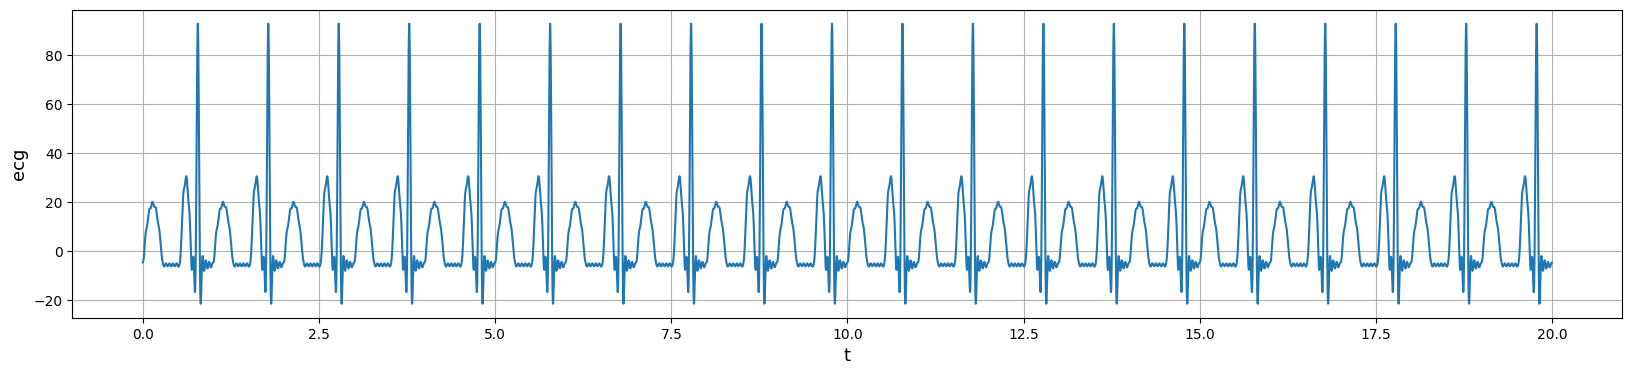

In [73]:
plt.figure(figsize=(20,4))
plt.plot(t,ecg)
plt.xlabel('t', fontsize=13)
plt.ylabel('ecg', fontsize=13)
plt.grid (True)
plt.show()

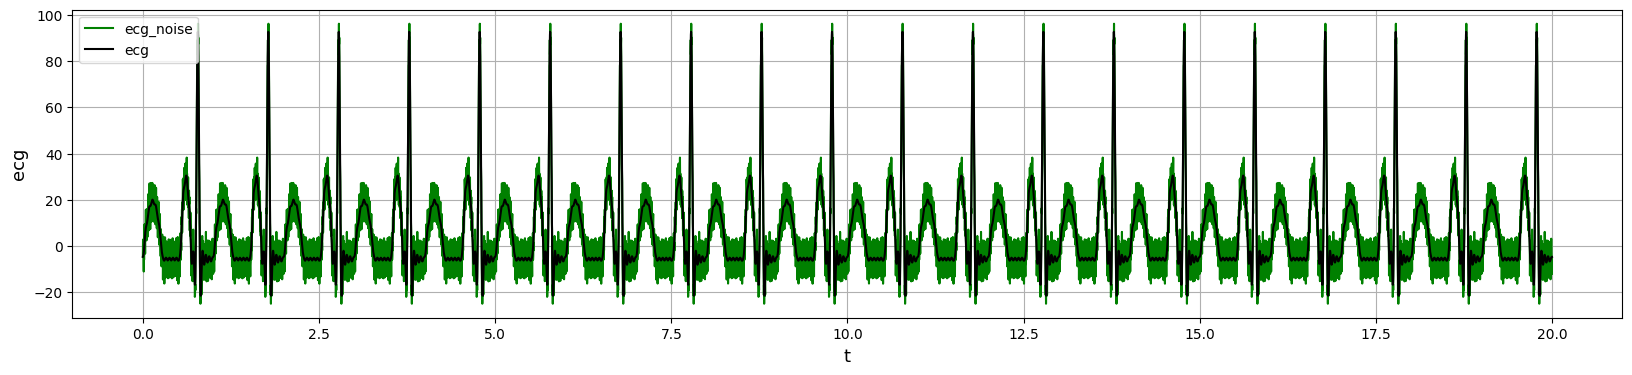

In [74]:
r = 5*np.sin (2*np.pi*55*t) + 5*np.sin (2*np.pi*150*t)

ecg_noise = ecg + r

plt.figure(figsize=(20,4))
#plt.plot(t,ecg,"k", label="ecg")
plt.plot(t,ecg_noise,"g",label="ecg_noise")
plt.plot(t,ecg,"k", label="ecg")
plt.xlabel('t', fontsize=13)
plt.ylabel('ecg', fontsize=13)
plt.legend()
plt.grid (True)
plt.show()

# Apartado B

In [75]:
Fs = 400
N7 = 2000
Fs = 400
w7 = np.arange (0,np.pi,1/Fs)

w1 = 2*np.pi*55/Fs #Frecuencia de Filtrado Notch
w2 = 2*np.pi*150/Fs #Frecuencia de Filtrado Notch

q1_7 = np.cos(w1) + 1j*np.sin (w1) #En los ceros se ubican las frecuencias que quiero eliminar
q2_7 = np.cos(w1) - 1j*np.sin (w1)
q3_7 = np.cos(w2) + 1j*np.sin (w2) 
q4_7 = np.cos(w2) - 1j*np.sin (w2)

p1_7 = 0+1j*0
p2_7 = 0+1j*0
p3_7 = 0+1j*0
p4_7 = 0+1j*0 #Agrego polos en el origen para generar estabilidad

#Calculo la función H
H7 = ((np.exp(1j*w7)-q1_7)*(np.exp(1j*w7)-q2_7)*(np.exp(1j*w7)-q3_7)*(np.exp(1j*w7)-q4_7)) / (np.exp(1j*w7)**4)

/var/folders/qz/mrzkg5ld5klg34bfmz0j94sw0000gn/T/ipykernel_2271/3129121164.py:11: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  fig.legend ("Módulo","Fase")


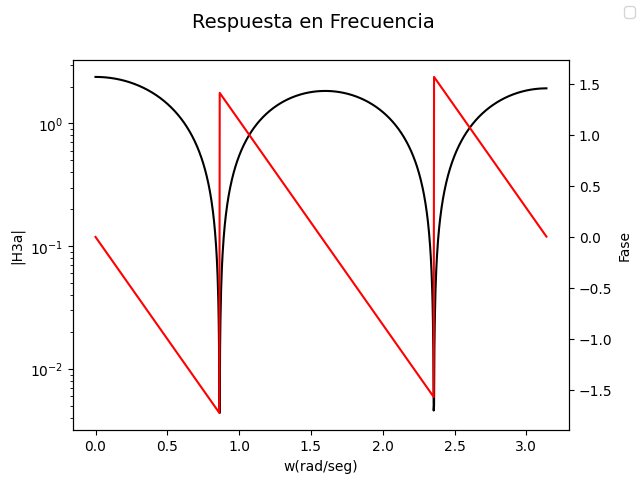

In [76]:
#Gráfico
fig,ax = plt.subplots()
fig.suptitle ("Respuesta en Frecuencia",fontsize=14)
ax.semilogy(w7,abs(H7),"k")
ax.set_xlabel ("w(rad/seg)")
ax.set_ylabel ("|H3a|")
ax2=ax.twinx()
ax2.plot(w7,np.angle(H7),"r")
ax2.set_xlabel ("w(rad/seg)")
ax2.set_ylabel ("Fase")
fig.legend ("Módulo","Fase")
plt.show()

In [77]:
#Para la respuesta al impulso y el filtro

ceros7 = np.array ([q1_7,q2_7,q3_7,q4_7])
polos7 = np.array ([p1_7,p2_7,p3_7,p4_7])

#Ceros
c7 = coeff (ceros7)
nc7 = np.arange (len(c7))

#Polos
p7 = coeff (polos7)
np7 = np.arange (len(p7))

c7,np.sum(c7)

(array([1.        , 0.11531747, 0.16308352, 0.11531747, 1.        ]),
 2.3937184554148896)

In [78]:
ecg_filt = FIRrespt (t,ecg_noise,nc7,c7)
ecg_filt = ecg_filt [2:len(ecg_filt)-2]

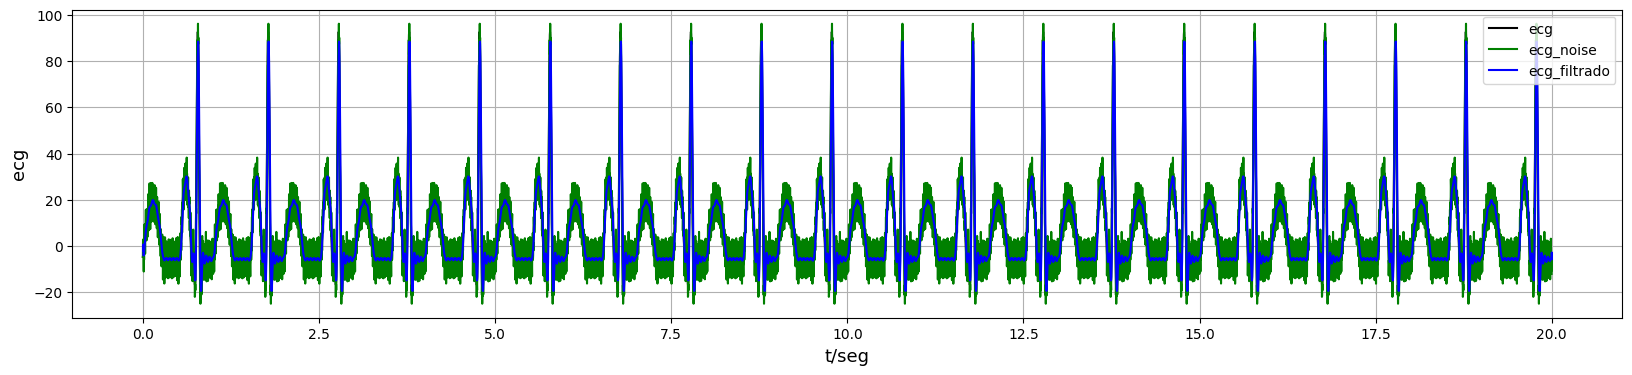

In [79]:
plt.figure(figsize=(20,4))
plt.plot(t,ecg,"k", label="ecg")
plt.plot(t,ecg_noise,"g",label="ecg_noise")
plt.plot(ecg_filt[:,0]/Fs,ecg_filt[:,1]/np.sum(c7),"b",label="ecg_filtrado")
plt.xlabel('t/seg', fontsize=13)
plt.ylabel('ecg', fontsize=13)
plt.legend()
plt.grid (True)
plt.show()

# Apartado C

In [80]:
def Circunferencia(x0,y0,r):
    phi = np.arange(0,2*np.pi,0.001)
    return x0 + r*np.cos(phi), y0 + r*np.sin(phi)

In [81]:
ceros77 = np.roots(np.array([1,0,-np.exp(11*np.pi*1j/20)-np.exp(3*np.pi*1j/2),0,np.exp(41*np.pi*1j/20)]))
polos77 = np.roots(np.array([1,0,0,0]))
ceros77, polos77

(array([-0.64944805-0.76040597j,  0.70710678-0.70710678j,
        -0.70710678+0.70710678j,  0.64944805+0.76040597j]),
 array([0., 0., 0.]))

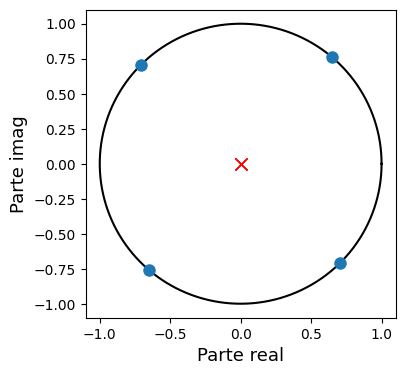

In [82]:
plt.figure(figsize=(4,4))
plt.plot(*Circunferencia(0,0,1), c='k')
plt.plot(ceros77.real,ceros77.imag,'o',ms=8)
plt.plot(polos77.real,polos77.imag,'rx',ms=8)
plt.xlabel('Parte real', fontsize=13)
plt.ylabel('Parte imag', fontsize=13)
plt.show()

In [83]:
#Coeficientes de los ceros
C7 = np.array ([ 1 , -q1_7-q2_7-q3_7-q4_7 , q1_7*q2_7+q1_7*q3_7+q1_7*q4_7+q2_7*q3_7+q2_7*q4_7+q3_7*q4_7 , -q1_7*q2_7*q3_7-q1_7*q2_7*q4_7-q1_7*q3_7*q4_7-q2_7*q3_7*q4_7 , q1_7*q2_7*q3_7*q4_7]).real

#Coeficientes de los polos
D7 = np.array ([ 1 , 0 , 0 , 0 , 0 ]).real

print (C7,np.sum(C7))


#Función impulso unitario
nx = np.arange (-(len(C7)-1),40)
impulso = np.piecewise (nx,[nx==0],[lambda nx:1, lambda nx: 0])

ny7 = np.arange (-(len(C7)-1),40)

#Hacemos que nuestras salidas pasadas sean iguales a cero
y7 = np.arange (0,len(ny7),dtype=np.float64)
y7[0] = 0 ; y7[1] = 0 ; y7[2] = 0 ; y7[3] = 0

[1.         0.11531747 0.16308352 0.11531747 1.        ] 2.3937184554148896


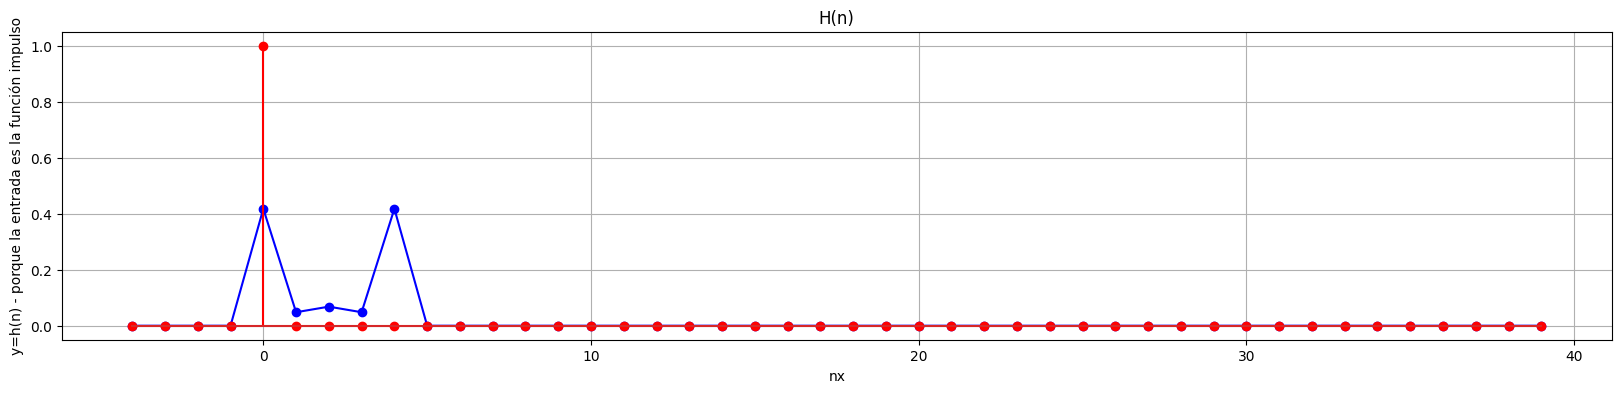

In [84]:
for i in np.arange (len(C7)-1,len(y7)): #"i" equivale a "r"
    z7=0
    for j in np.arange(1,len(D7)): #"j" eqiuvale a "k"
         z7 = z7 - D7[j]*y7[i-j] + C7[j]*impulso[i-j]
    y7[i] = (z7 + C7[0] * impulso[i]/D7[0])
#x = impulso (entrada)


plt.figure (figsize=(20,4))
plt.plot (ny7,y7/np.sum(C7),"o-",color="blue")
plt.stem (nx,impulso,"r")
plt.xlabel ("nx")
plt.ylabel ("y=h(n) - porque la entrada es la función impulso")
plt.title ("H(n)")
plt.grid (True)
plt.show ()

In [85]:
##### Otra forma de obtener los coeficientes (utilizando la función coeff)
CEROS7 = np.array ([q1_7,q2_7,q3_7,q4_7])
POLOS7 = np.array ([0,0,0,0])

h7 = coeff (CEROS7)
nh7 = np.arange (len(h7))
h7,np.sum(h7)

(array([1.        , 0.11531747, 0.16308352, 0.11531747, 1.        ]),
 2.3937184554148896)

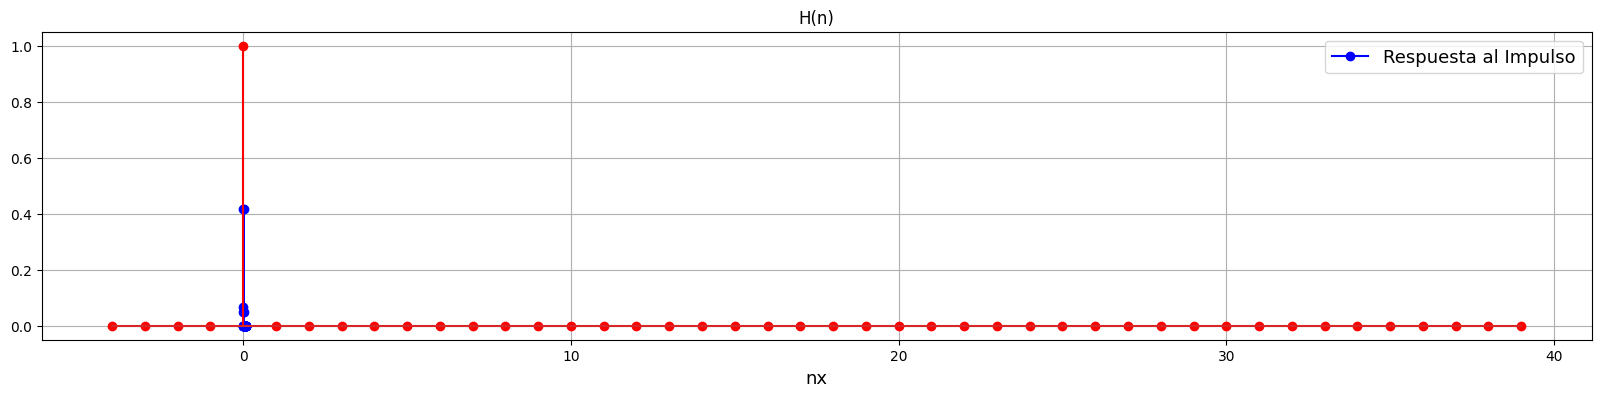

In [86]:
resp_impB = FIRrespt (nx,impulso,nh7,h7)
#Fs = 1

plt.figure (figsize=(20,4))
plt.plot (resp_impB[:40,0]/Fs,resp_impB[:40,1]/np.sum(h7),"bo-",label="Respuesta al Impulso")
plt.stem (nx,impulso,"r")
plt.xlabel ("nx", fontsize=13)
plt.legend (fontsize=13)
plt.title ("H(n)")
plt.grid (True)
plt.show()

- - -